<a href="https://colab.research.google.com/github/AndreLYL/Tensorflow-learning/blob/master/Tensorflow_Udacity_tutorial_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Celsius to Fahrenheit
该练习目的是将摄氏温度转化为华氏温度

In [0]:
# import dependencies 导入依赖项
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)  ## 设置tensorflow仅记录错误信息

import numpy as np


In [0]:
# Set up Training data
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q): ## 为啥这里用了c？ 有了i以后c的作用是什么？
  print("{} degree of Celsius = {} degrees Fahrenheit".format(c,fahrenheit_a[i]))

-40.0 degree of Celsius = -40.0 degrees Fahrenheit
-10.0 degree of Celsius = 14.0 degrees Fahrenheit
0.0 degree of Celsius = 32.0 degrees Fahrenheit
8.0 degree of Celsius = 46.0 degrees Fahrenheit
15.0 degree of Celsius = 59.0 degrees Fahrenheit
22.0 degree of Celsius = 72.0 degrees Fahrenheit
38.0 degree of Celsius = 100.0 degrees Fahrenheit


In [0]:
# Create the model
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) ## 单个密集层组成的模型，模型的输入是1，units制定了这个层级将有多少内部变量

In [0]:
# Assemble layers into the model
model = tf.keras.Sequential([l0])  ## 注意这个里面是l0不是数字10


In [0]:
# Compile the model, with loss and optimizer functions (Tensorflow在训练过程中使用损失函数和优化器来寻找最佳模型)
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1)) ## 学习速率：决定了训练模型的速度，取值范围（0.1 - 0.001）

In [0]:
# Train the model
history = model.fit(celsius_q, fahrenheit_a, epochs=2000, verbose=False) ## epoch: 训练周期（一个周期值得是我们看到的样本进行一次完整的迭代）。在这里有7个映射样本，因此共训练了3500个样本
print("Finished training the model")

Finished training the model


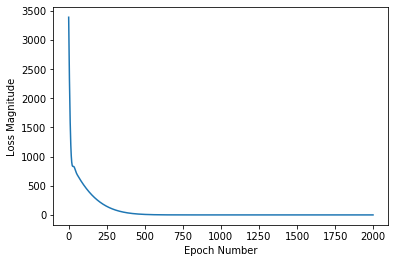

In [0]:
# Display training statistics

import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [0]:
# Use model to predict values

print(model.predict([100.0]))

[[211.74744]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

**这里对学习速率还有epochs的值对最终的预测精度的影响比较好奇，等有时间用循环写个程序，比较一些精度的变化。**

In [0]:
# Looking at the layer weights

print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.7979496]], dtype=float32), array([31.95248], dtype=float32)]


In [0]:
# A little Experiment （在这里用的不是单层，而是三层）
l0 = tf.keras.layers.Dense(units=4, input_shape=[1]) ## 模型的输入是1，units制定了这个层级将有多少内部变量,这里是四个
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74742]]
Model predicts that 100 degrees Celsius is: [[211.74742]] degrees Fahrenheit
These are the l0 variables: [array([[-0.22621544,  0.05168809, -0.255059  , -0.63798225]],
      dtype=float32), array([-3.2059586,  3.0314796, -3.186534 , -3.2885573], dtype=float32)]
These are the l1 variables: [array([[-0.8251783 ,  0.09534841, -0.304599  ,  0.3284568 ],
       [ 1.1277455 , -0.42100152, -0.4569367 ,  0.40371725],
       [-0.7352262 ,  0.818171  , -0.27656206, -0.0193001 ],
       [-0.25007343,  0.8884285 , -0.22468898, -0.10961687]],
      dtype=float32), array([ 3.1224391, -3.1751733,  1.418294 ,  1.3815495], dtype=float32)]
These are the l2 variables: [array([[ 1.3352884 ],
       [-1.1483883 ],
       [ 0.2645564 ],
       [-0.06818153]], dtype=float32), array([3.085905], dtype=float32)]


## 存疑问题


*   学习速率和周期对最终模型精度的影响


